# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=Metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | la'ie
Processing Record 6 of Set 1 | inhambane
Processing Record 7 of Set 1 | utrik
Processing Record 8 of Set 1 | hawaiian paradise park
Processing Record 9 of Set 1 | papatowai
Processing Record 10 of Set 1 | hotan
Processing Record 11 of Set 1 | mersing
Processing Record 12 of Set 1 | mombetsu
Processing Record 13 of Set 1 | archangelos
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | uvira
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | mandvi
Processing Record 20 of Set 1 | badger
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | salalah
Processing Record 2

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,11.57,92,97,1.79,NZ,1686614204
1,edinburgh of the seven seas,-37.0676,-12.3116,15.23,93,100,9.20,SH,1686614205
2,yellowknife,62.4560,-114.3525,9.29,57,75,7.20,CA,1686614205
3,bethel,41.3712,-73.4140,20.93,87,100,5.14,US,1686614018
4,la'ie,21.6477,-157.9253,31.98,68,43,2.68,US,1686614205


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.57,92,97,1.79,NZ,1686614204
1,edinburgh of the seven seas,-37.0676,-12.3116,15.23,93,100,9.20,SH,1686614205
2,yellowknife,62.4560,-114.3525,9.29,57,75,7.20,CA,1686614205
3,bethel,41.3712,-73.4140,20.93,87,100,5.14,US,1686614018
4,la'ie,21.6477,-157.9253,31.98,68,43,2.68,US,1686614205


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

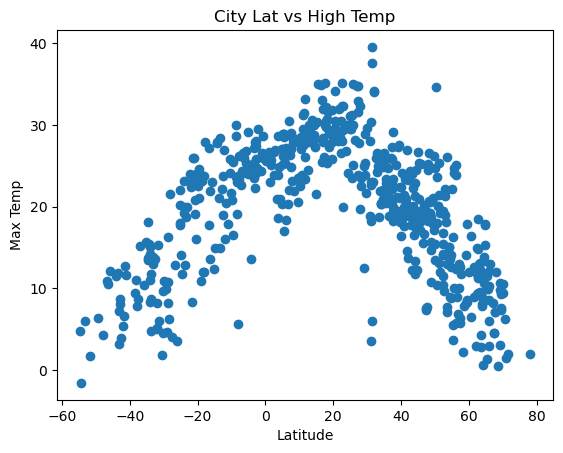

In [3]:
# Build scatter plot for latitude vs. temperature
plt.scatter(x=city_data_df["Lat"], y=city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Lat vs High Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

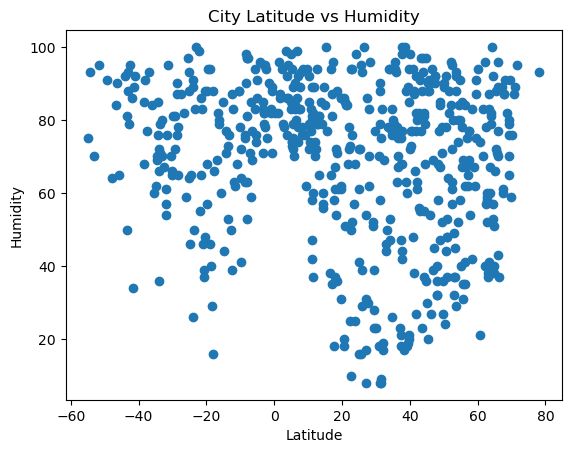

In [4]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x=city_data_df["Lat"], y=city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

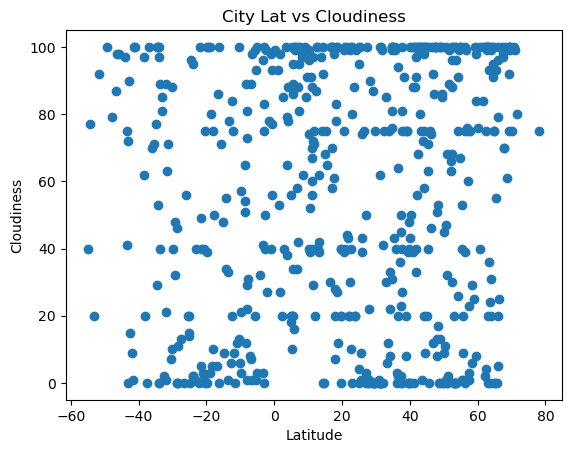

In [6]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x=city_data_df["Lat"], y=city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Lat vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

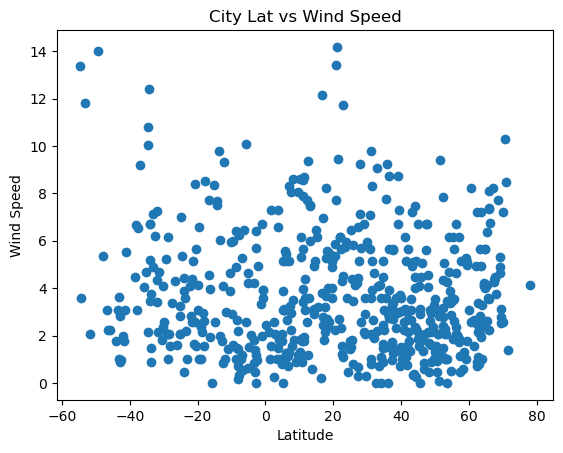

In [7]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x=city_data_df["Lat"], y=city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Lat vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots
def linear_reg(xval, yval, title, textcoords):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xval, yval)
    regvals = xval * slope + intercept
    equation = f"y={str(round(slope, 2))}+x+{str(round(intercept, 2))}"

    plt.scatter(x=xval, y=yval)
    plt.plot(xval, regvals, "r-")
    plt.annotate(equation, xy=textcoords)
    plt.xlabel("Latitude")
    plt.ylabel(str(yval.name))
    plt.title(title)
    print(f"r-value: {rvalue**2}")
    plt.show()

In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
nhemi_df = city_data_df.loc[(city_data_df["Lat"] > 0)]

# Display sample data
nhemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,yellowknife,62.4560,-114.3525,9.29,57,75,7.20,CA,1686614205
3,bethel,41.3712,-73.4140,20.93,87,100,5.14,US,1686614018
4,la'ie,21.6477,-157.9253,31.98,68,43,2.68,US,1686614205
6,utrik,11.2278,169.8474,27.61,81,67,8.55,MH,1686613924
7,hawaiian paradise park,19.5933,-154.9731,28.73,62,20,3.60,US,1686614206


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
shemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
shemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.57,92,97,1.79,NZ,1686614204
1,edinburgh of the seven seas,-37.0676,-12.3116,15.23,93,100,9.20,SH,1686614205
5,inhambane,-23.8650,35.3833,20.01,89,2,4.43,MZ,1686614206
8,papatowai,-46.5619,169.4708,10.91,84,87,3.08,NZ,1686613926
13,port-aux-francais,-49.3500,70.2167,6.37,91,100,13.99,TF,1686614208


###  Temperature vs. Latitude Linear Regression Plot

r-value: 0.5797441894819282


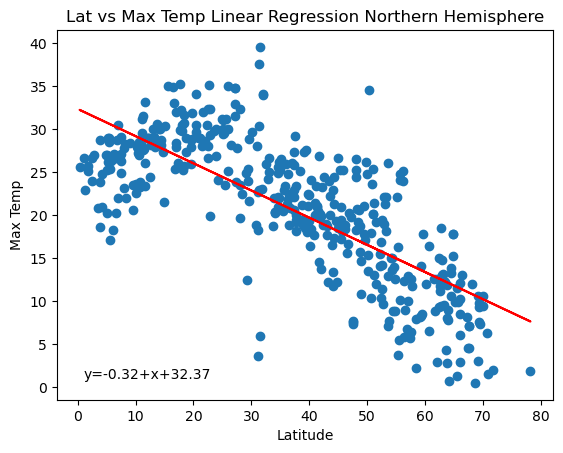

In [24]:
# Linear regression on Northern Hemisphere
linear_reg(xval=nhemi_df["Lat"], yval=nhemi_df["Max Temp"], title="Lat vs Max Temp Linear Regression Northern Hemisphere", textcoords=(1, 1))

r-value: 0.63613789484206


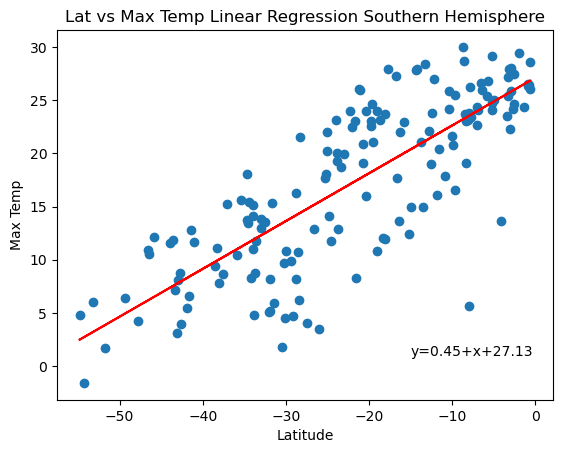

In [28]:
# Linear regression on Southern Hemisphere
linear_reg(xval=shemi_df["Lat"], yval=shemi_df["Max Temp"], title="Lat vs Max Temp Linear Regression Southern Hemisphere", textcoords=(-15, 1))

**Discussion about the linear relationship:** In the northern hemisphere, latitude is negatively correlated with temperature, and in the southern hemisphere, the opposite is true.

### Humidity vs. Latitude Linear Regression Plot

r-value: 0.011493187199636165


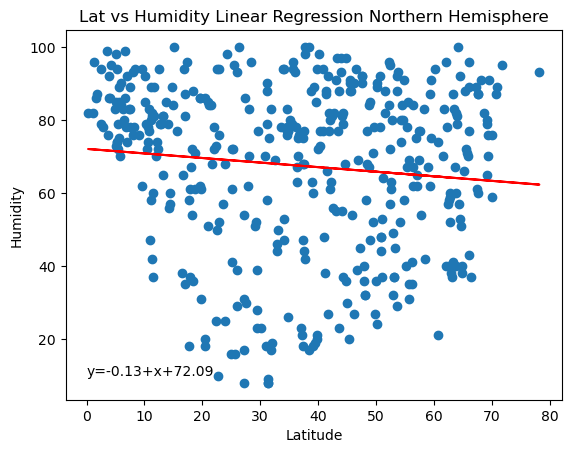

In [33]:
# Northern Hemisphere
linear_reg(xval=nhemi_df["Lat"], yval=nhemi_df["Humidity"], title="Lat vs Humidity Linear Regression Northern Hemisphere", textcoords=(0, 10))

r-value: 0.0005751079160991196


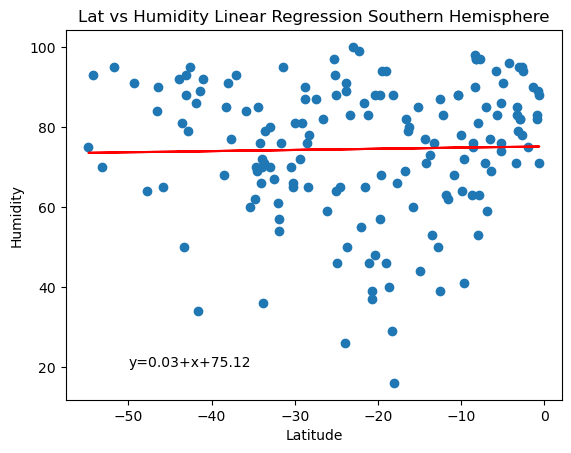

In [38]:
# Southern Hemisphere
linear_reg(xval=shemi_df["Lat"], yval=shemi_df["Humidity"], title="Lat vs Humidity Linear Regression Southern Hemisphere", textcoords=(-50, 20))

**Discussion about the linear relationship:** Latitude seems to bear little relationship to humidity.

### Cloudiness vs. Latitude Linear Regression Plot

r-value: 7.399032861622447e-05


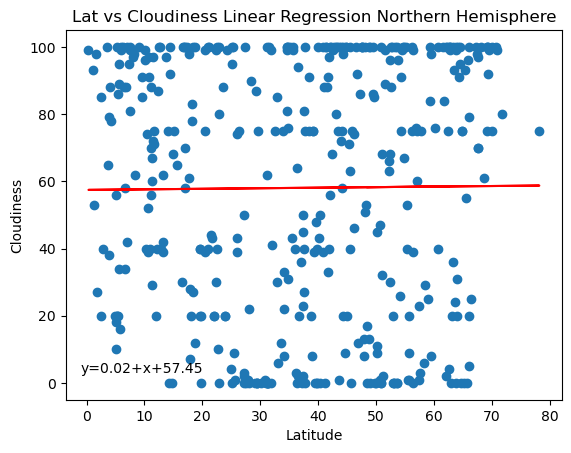

In [43]:
# Northern Hemisphere
linear_reg(xval=nhemi_df["Lat"], yval=nhemi_df["Cloudiness"], title="Lat vs Cloudiness Linear Regression Northern Hemisphere", textcoords=(-1, 3))

r-value: 0.008669431100294195


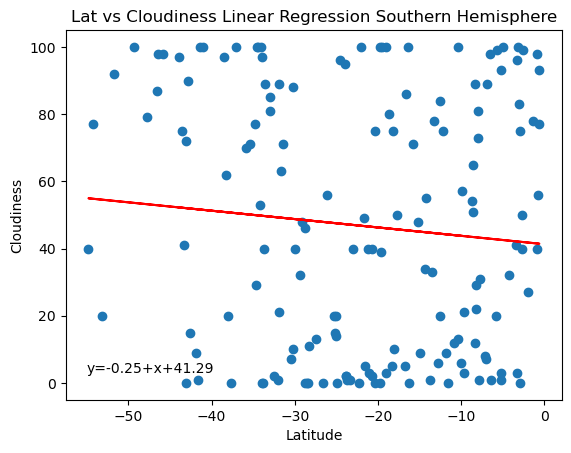

In [52]:
# Southern Hemisphere
linear_reg(xval=shemi_df["Lat"], yval=shemi_df["Cloudiness"], title="Lat vs Cloudiness Linear Regression Southern Hemisphere", textcoords=(-55, 3))

**Discussion about the linear relationship:** Latitude seems to bear little to no impact on cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

r-value: 0.002008597409571434


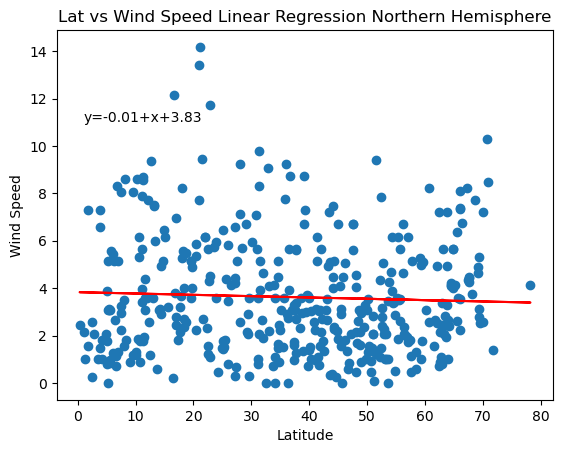

In [49]:
# Northern Hemisphere
linear_reg(xval=nhemi_df["Lat"], yval=nhemi_df["Wind Speed"], title="Lat vs Wind Speed Linear Regression Northern Hemisphere", textcoords=(1, 11))

r-value: 0.04680207731370731


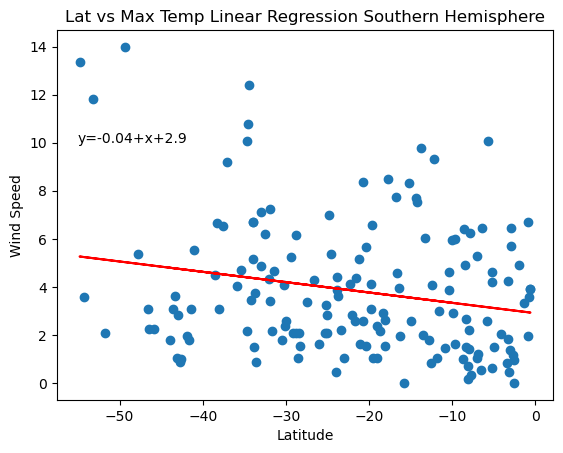

In [51]:
# Southern Hemisphere
linear_reg(xval=shemi_df["Lat"], yval=shemi_df["Wind Speed"], title="Lat vs Max Temp Linear Regression Southern Hemisphere", textcoords=(-55, 10))

**Discussion about the linear relationship:** Latitude seems to have negligible impact on wind speed in either hemisphere